In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
zomato_df = pd.read_csv('zomato.csv')
zomato_df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [3]:
location = zomato_df.groupby(['location']).size().to_frame('loc_count').reset_index()
location.sort_values(by= 'loc_count', ascending=False)

,location,loc_count
0,BTM,5124
22,HSR,2523
45,Koramangala 5th Block,2504
29,JP Nagar,2235
89,Whitefield,2144
...,...,...
88,West Bangalore,6
91,Yelahanka,6
30,Jakkur,3
68,Rajarajeshwari Nagar,2


In [5]:
online_order = zomato_df.groupby(['online_order']).size().to_frame('order_count').reset_index()
online_order['order %']= online_order['order_count']/51717*100
online_order

,online_order,order_count,order %
0,No,21273,41.133476
1,Yes,30444,58.866524


In [6]:
table_booking = zomato_df.groupby(['book_table']).size().to_frame('table_count').reset_index()
table_booking['table %'] = table_booking['table_count']/51717*100
table_booking

,book_table,table_count,table %
0,No,45268,87.530213
1,Yes,6449,12.469787


In [7]:
rest_type = zomato_df.groupby(['rest_type']).size().to_frame('count').reset_index()
rest_type.columns

Index(['rest_type', 'count'], dtype='object')

In [8]:
from pandas import Series
rest_type_separate = pd.concat([Series(row['count'], row['rest_type'].split(','))              
                    for _, row in rest_type.iterrows()]).reset_index()
rest_type_separate.columns

Index(['index', 0], dtype='object')

In [9]:
rest_type_separate.columns= ['rest_types', 'type_count']

In [10]:
rest_type_separate['rest_types'] = rest_type_separate['rest_types'].str.strip()

In [11]:
rest_type_separate.columns

Index(['rest_types', 'type_count'], dtype='object')

In [12]:
rest_type_separate_count = rest_type_separate.groupby('rest_types').type_count.sum().sort_values(ascending=False)
rest_type_separate_count_frame=rest_type_separate_count.to_frame()
rest_type_separate_count_frame.head()

,type_count
rest_types,
Quick Bites,20639
Casual Dining,13057
Cafe,5074
Delivery,4641
Dessert Parlor,3211


In [13]:
rest_type_separate_count_frame.reset_index(level=0, inplace=True)
# rest_type_separate_count_frame['rest_type_unique'] = rest_type_separate_count_frame.index
rest_type_separate_count_frame

,rest_types,type_count
0,Quick Bites,20639
1,Casual Dining,13057
2,Cafe,5074
3,Delivery,4641
4,Dessert Parlor,3211
5,Bar,2457
6,Takeaway,2157
7,Bakery,1998
8,Beverage Shop,1471
9,Pub,950


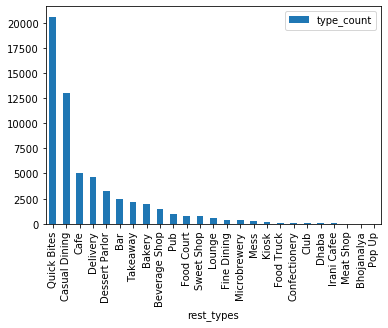

In [14]:
rest_type_separate_count_frame.plot('rest_types','type_count', kind='bar')

In [15]:
restaurant = zomato_df.groupby(['name']).size().to_frame('frequency').reset_index()
restaurant.sort_values(by= 'frequency', ascending=False)[:30].head()

,name,frequency
1320,Cafe Coffee Day,96
5549,Onesta,85
3788,Just Bake,73
2446,Empire Restaurant,71
2577,Five Star Chicken,70


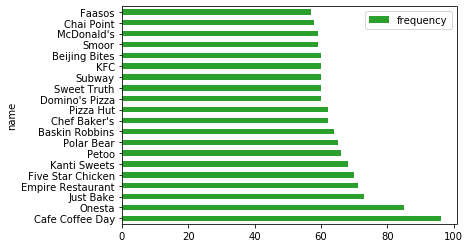

In [16]:
restaurant.sort_values(by= 'frequency', ascending=False)[:20].plot('name','frequency', kind='barh',color='C2')

In [17]:
zomato_df['rate'] = zomato_df['rate'].str[:3]
zomato_df['rate'] = pd.to_numeric(zomato_df['rate'],errors='coerce')

In [18]:
rest_rating_df= zomato_df.groupby('name',as_index=False)['rate'].mean()
rest_rating_df.head()

,name,rate
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#Vibes Restro,NaN
3,#refuel,3.7
4,'Brahmins' Thatte Idli,NaN


In [19]:
rest_rating_count_df= pd.merge(rest_rating_df,restaurant,on='name',how='left')
rest_rating_count_df

,name,rate,frequency
0,#FeelTheROLL,3.400000,2
1,#L-81 Cafe,3.900000,9
2,#Vibes Restro,NaN,3
3,#refuel,3.700000,3
4,'Brahmins' Thatte Idli,NaN,1
...,...,...,...
8787,late100,NaN,5
8788,nu.tree,4.314286,8
8789,re:cess - Hilton Bangalore Embassy GolfLinks,4.100000,3
8790,repEAT Hub,NaN,2


In [20]:
rest_rating_count_df.sort_values(by= 'rate', ascending=False)[rest_rating_count_df.frequency > 50]

<ipython-input-20-a2b051cc7429>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,name,rate,frequency
1915,Corner House Ice Cream,4.465385,52
5549,Onesta,4.410588,85
6906,Smally's Resto Cafe,4.172222,54
6920,Smoor,4.091525,59
5840,Polar Bear,4.031034,65
2446,Empire Restaurant,4.030435,71
7463,Sweet Truth,3.950000,60
2490,Faasos,3.930357,57
2756,Frozen Bottle,3.900000,51
3958,Kanti Sweets,3.898529,68


In [21]:
zomato_df['cuisines'] = zomato_df['cuisines'].astype(str)
cuisines = zomato_df['cuisines'].str.split(',', expand=True).values.ravel()

In [22]:
counts,values = pd.Series(cuisines).value_counts().values, pd.Series(cuisines).value_counts().index
cuisines_df = pd.DataFrame(list(zip(values,counts)),columns=["cuisines","count"])
cuisines_df['cuisines'] = cuisines_df['cuisines'].str.lstrip()
list_cuisine=  cuisines_df['cuisines'].tolist()
list_cuisine

['Chinese',
 'North Indian',
 'North Indian',
 'Fast Food',
 'South Indian',
 'Cafe',
 'Continental',
 'South Indian',
 'Beverages',
 'Desserts',
 'Biryani',
 'Chinese',
 'Biryani',
 'Italian',
 'Fast Food',
 'Bakery',
 'Desserts',
 'Continental',
 'Street Food',
 'Burger',
 'Seafood',
 'Pizza',
 'Mughlai',
 'Beverages',
 'Rolls',
 'Momos',
 'Andhra',
 'Salad',
 'Cafe',
 'Kebab',
 'American',
 'Ice Cream',
 'Kerala',
 'Asian',
 'Thai',
 'Ice Cream',
 'Street Food',
 'Sandwich',
 'Juices',
 'Mithai',
 'Finger Food',
 'Italian',
 'Bakery',
 'Pizza',
 'BBQ',
 'Kerala',
 'Andhra',
 'Arabian',
 'Arabian',
 'Steak',
 'American',
 'Finger Food',
 'European',
 'Healthy Food',
 'Burger',
 'Healthy Food',
 'Mediterranean',
 'Mangalorean',
 'Asian',
 'Bengali',
 'Seafood',
 'Juices',
 'Mexican',
 'Mithai',
 'Mughlai',
 'Rolls',
 'Mangalorean',
 'European',
 'Tea',
 'Hyderabadi',
 'Japanese',
 'Mexican',
 'Bengali',
 'Tibetan',
 'Tibetan',
 'Tea',
 'Vietnamese',
 'Salad',
 'Thai',
 'Coffee',
 'BBQ

In [23]:
cuisines_df_new = cuisines_df.groupby(['cuisines'])['count'].sum().reset_index()
cuisines_df_new.sort_values(by= 'count', ascending=False)[:20]

,cuisines,count
74,North Indian,21085
27,Chinese,15547
92,South Indian,8644
33,Fast Food,8096
17,Biryani,6492
29,Continental,5765
30,Desserts,5633
23,Cafe,5303
15,Beverages,4747
48,Italian,3389


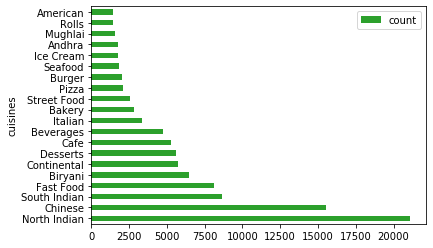

In [24]:
cuisines_df_new.sort_values(by= 'count', ascending=False)[:20].plot('cuisines','count', kind='barh',color='C2')

In [25]:
zomato_df['dish_liked'] = zomato_df['dish_liked'].astype(str)
dish = zomato_df['dish_liked'].str.split(',', expand=True).values.ravel()

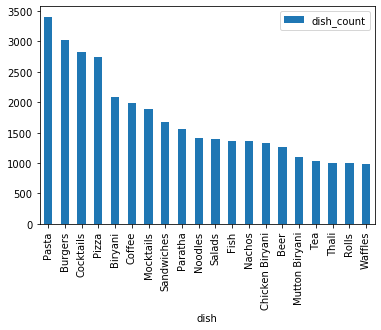

In [26]:
counts,values = pd.Series(dish).value_counts().values, pd.Series(dish).value_counts().index
dish_df = pd.DataFrame(list(zip(values,counts)),columns=["dish","dish_count"])
dish_df['dish'] = dish_df['dish'].str.lstrip()
dish_liked_df = dish_df.groupby(['dish'])['dish_count'].sum().reset_index()
dish_liked_df.sort_values(by= 'dish_count', ascending=False)[1:21]
dish_liked_df.sort_values(by= 'dish_count', ascending=False)[1:21].plot('dish','dish_count', kind='bar')

In [27]:
import matplotlib.pyplot as plt
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].astype(str).str.replace(',', '')
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].astype(float)
zomato_df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

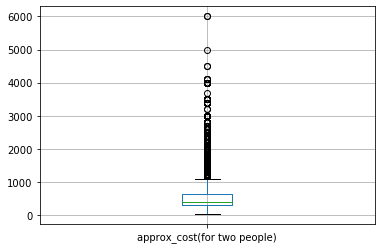

In [28]:
zomato_df.boxplot(column="approx_cost(for two people)")

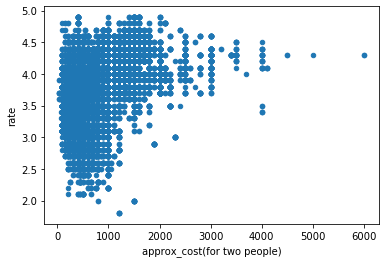

In [29]:
scatter_zomato = zomato_df.plot.scatter(x='approx_cost(for two people)',y= 'rate')